# ch04 신경망 학습

`학습`이란 훈련 데이터로 부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻한다.  
이번 장에서는 신경망이 학습할 수 있도록 해주는 `지표`인 손실함수를 다룬다.  
이 손실함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는것이 학습의 목표이다.  
손실함수의 값을 가급적 작게 만드는 기법으로, 함수의 기울기를 활용하는 경사법을 다룬다.

## 4.1 데이터에서 학습한다!

신경망의 특징은 데이터를 보고 학습할 수 있다는 점이다.   
데이터에서 학습한다는 것은 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다는 뜻이다.  
2장의 퍼셉트론 예에서는 진리표를 보면서 사람이 수작업으로 매개변수를 설정했지만 그때는 매개변수가 3개 뿐이었다.  
실제 신경망에서는 매개변수가 수천에서 수억개가 되므로, 매개변수를 수작업으로 정한다는 것은 아예 불가능하다. 

2장의 퍼셉트론도 직선으로 분리할 수 있는(선형분리가능) 문제라면 데이터로 부터 자동으로 학습할 수 있다.  
선형 분리 가능 문제는 유한번의 학습을 통해 풀 수 있다는 사실이 `퍼셉트론 수렴 정리`로 증명되었다.  
하지만 비선형 분리 문제는 자동으로 학습할 수 없다.

### 4.1.1 데이터 주도 학습

기계학습은 데이터가 중요하다.  
데이터가 없으면 아무것도 시작되지 않는다.
그래서 기계학습의 중심에는 `데이터`가 존재한다.  
MNIST 데이터셋에서 5를 제대로 분류하는 프로그램을 작성하려면, 알고리즘을 밑바닥부터 '설계하는'대신, 주어진 데이터를 잘 활용해서 해결해야한다.  
그런 방법의 하나로, 이미지에서 `특징(feature)`을 추출하고 그 특징의 패턴을 기계학습 기술로 학습하는 방법이 있다.  여기서 말하는 특징은 입력데이터(입력 이미지)에서 본질적인 데이터(중요한 데이터)를 정확하게 추출할 수 있도록 설계된 변환기를 가리킨다.  
이미지의 특징은 보통 벡터로 기술하고, 컴퓨터 비전 분야에서는 SIFT, SURF, HOG등의 특징을 많이 사용한다.  이런 특징을 사용하여 이미지 데이터를 벡터로 변환하고, 변환된 벡터를 가지고 지도 학습 방식의 대표 분류 기법인 SVM, KNN등으로 학습할 수 있다.

문제에 적합한 특징을 쓰지 않으면 좋은 결과를 얻을 수 없다.  
예를 들어 개의 얼굴을 구분하려 할때는 숫자를 인식할 때와는 다른 특징을 '사람'이 생각해 내야한다.   
즉, 특징과 기계학습을 활용한 접근에도 문제에 따라서는 '사람'이 적절한 특징을 생각해내야한다.

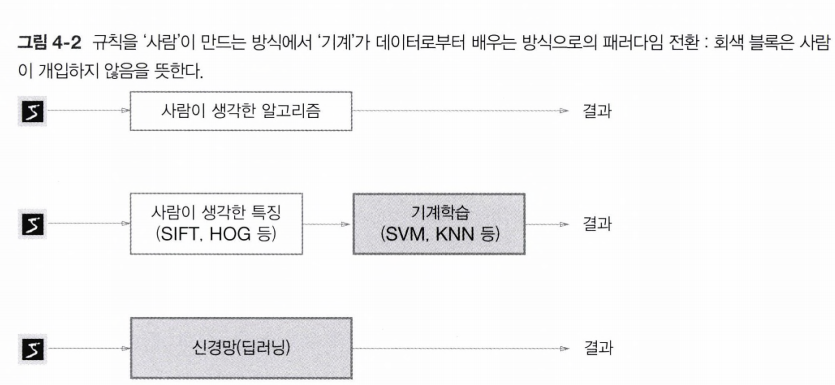

위의 그림과 같이 신경망은 이미지를 있는 그대로 학습한다.  
특징과 기계학습 방식에서는 특징을 사람이 설계했지만, 신경망은 이미지에 포함된 중요한 특징까지도 '기계'가 스스로 학습한다.

신경망의 이점은 모든 문제를 같은 맥락에서 풀 수 있다는 점에 있다.  
예를 들어 '5'를 인식하는 문제든, '개'를 인식하는 문제든, 아니면 '사람의 얼굴'을 인식하는 문제든,  세부사한과 관계없이 신경망은 주어진 데이터를 온전히 학습하고, 주어진 문제의 패턴을 발견하려 시도한다.  즉, 신경망은 모든 문제를 주어진 데이터 그대로를 입력 데이터로 활용해 'end-to-end'로 학습할 수 있다.

### 4.1.2 훈련데이터와 시험 데이터

기계학습 문제는 데이터를 `훈련 데이터(training data)`와 `시험 데이터(test data)`로 나눠 학습과 실험을 수행하는 것이 일반적이다.  
우선 훈련 데이터만 사용하여, 학습하면서 최적의 매개변수를 찾는다.  그런 다음 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가하는 것이다.  
`범용 능력`을 제대로 평가하기 위해 훈련데이터와 `시험 데이터`를 분리하는 것이다.  
범용능력은 아직 보지 못한 데이터(훈련 데이터에 포함되지 않는 데이터)로도 문제를 올바르게 풀어내는 능력이다.  
이 범용능력을 획득하는 것이 기계학습의 최종 목표이다. 
한 데이터셋에만 지나치게 최적화 된 상태를 `오버피팅(overfitting)`이라고 한다.  

## 4.2 손실함수

신경망은 '하나의 지표'를 기준으로 최적의 매개변수 값을 탐색한다.  
신경망 학습에서 사용하는 지표는 `손실 함수(loss function)`라고 한다.  
이 손실 함수는 임의의 함수를 사용할 수도 있지만 일반적으로는 오차제곱합과 교차 엔트로피 오차를 사용한다.

### 4.2.1 오차제곱합

가장 많이 쓰이는 손실함수는`오차제곱합(sum of squares for error)`이다.

$$E = \frac{1}{2}*\sum_{k}(y_k-t_k)^2$$

여기서 $y_k$는 신경망의 출력(신경망이 추정한값), $t_k$는 정답레이블, $k$는 데이터의 차원 수를 나타낸다.</br>
이를테면, "MNIST 숫자 인식"예에서 $y_k$와 $t_k$는 다음과 같은 원소 10개짜리 데이터이다.

In [2]:
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0]

이 배열들의 원소는 첫 번째 인덱스부터 순서대로 숫자 '0','1','2',...일때 값이다.  
여기에서 신경망의 출력 y는 소프트 맥스 함수의 출력이다.  
소프트맥스 함수의 출력은 확률로 해석할 수 있으므로, 이 예에서는 이미지가 '0'일 확률은 
0.1, '1'일 확률은 0.05, '2'일 확률은 0.6이다.  
정답 레이블인 t는 정답을 가리키는 위치의 원소는 1로, 그 외에는 0으로 표기한다.  
여기에서는 숫자 '2'에 해당하는 값이 1이므로 정답이 '2'이다.  
이처럼 한 원소만 1로 하고 그 외는 0으로 나타내는 표기법을 `원-핫 인코딩`이라 한다.


In [6]:
import numpy as np

In [7]:
def sum_squares_error(y,t):
    return 0.5* np.sum((y-t)**2)

In [ ]:
# 예 1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0]

In [8]:
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [10]:
# 예 2 : '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

In [11]:
sum_squares_error(np.array(y), np.array(t))

0.5975

예 1은 정답이 '2'이고, 신경망의 출력도 '2'에서 가장 높은 경우이다.  
예 2는 정답은 똑같이 '2'지만, 신경망의 출력은 '7'에서 가장 높다.
오차제곱합 기준으로 첫 번째 추정 결과가 오차가 더 작으니, 정답에 가깝다.

### 4.2.2 교차 엔트로피 오차

또 다른 손실 함수로 `교차 엔트로피 오차(Cross entropy error), CEE`도 자주 이용한다.

$$E = -\sum_{k}t_k*logy_k$$

여기에서 log는 밑이 $e$인 자연로그이다.  
$y_k$는 신경망의 출력, $t_k$는 정답 레이블이다.
또, $t_k$는 정답에 해당하는 인덱스의 원소만 1이고, 나머지는 0이다.(원-핫 인코딩)  
그래서 실질적으로 정답일때의 추정($t_k$가 1일 때의 $y_k$)의 자연로그를 계산하는 식이 된다.

예를 들어 정답 레이블은 '2'가 정답이라 하고, 이때의 신경망 출력이 0.6이면  
-log0.6 = 0.51이 된다.  
또한, 같은 조건에서 신경망 출력이 0.1이라면 -log0.1 = 2.30이 된다.  
즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다.

In [15]:
import matplotlib.pyplot as plt
import math

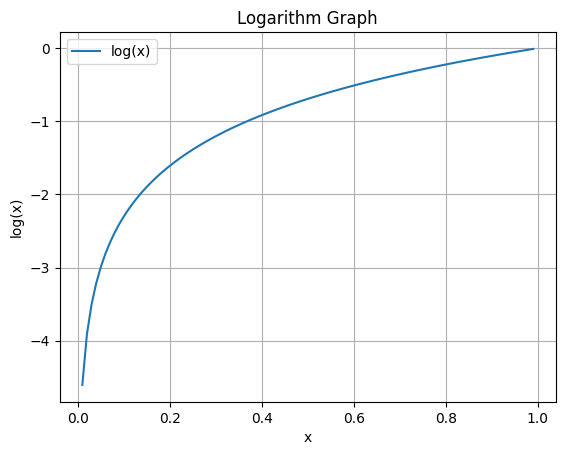

In [40]:
# x 배열 생성 (0을 제외한 작은 값부터 시작)
x = np.arange(0.01, 1, 0.01)

# 로그 값 계산
y = np.log(x)

# 그래프 그리기
plt.plot(x, y, label='log(x)')
plt.xlabel('x')
plt.ylabel('log(x)')
plt.title('Logarithm Graph')
plt.legend()
plt.grid(True)
plt.show()

위의 그림에서 보듯이 $x$가 1일 때, $y$는 0이 되고, $x$가 0에 가까워질수록 $y$의 값은 점점 작아진다.  
마찬가지로, 정답에 해당하는 출력이 작아질수록 오차는 커진다.